<a href="https://colab.research.google.com/github/viji514/coderscave_1/blob/main/customer_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Define the file path in your Google Drive
file_path = "/content/drive/MyDrive/customer analysis/Hackathon_Ideal_Data.csv"

In [9]:
# Load the dataset
df = pd.read_csv(file_path)
print(df.columns)

Index(['MONTH', 'STORECODE', 'QTY', 'VALUE', 'GRP', 'SGRP', 'SSGRP', 'CMP',
       'MBRD', 'BRD'],
      dtype='object')


In [5]:
# Display the first few rows of the dataset
print("Sample transactional data:")
print(df.head())

Sample transactional data:
  MONTH STORECODE  QTY  VALUE                GRP               SGRP  \
0    M1        P1   25     83  HAIR CONDITIONERS  HAIR CONDITIONERS   
1    M1        P1    6     22  HAIR CONDITIONERS  HAIR CONDITIONERS   
2    M1        P1    4     15  HAIR CONDITIONERS  HAIR CONDITIONERS   
3    M1        P1   15     60  HAIR CONDITIONERS  HAIR CONDITIONERS   
4    M1        P2    0      0  HAIR CONDITIONERS  HAIR CONDITIONERS   

               SSGRP                         CMP         MBRD  \
0  HAIR CONDITIONERS  HINDUSTAN UNILEVER LIMITED         DOVE   
1  HAIR CONDITIONERS  HINDUSTAN UNILEVER LIMITED         DOVE   
2  HAIR CONDITIONERS  HINDUSTAN UNILEVER LIMITED         DOVE   
3  HAIR CONDITIONERS               L'OREAL INDIA      GARNIER   
4  HAIR CONDITIONERS  HINDUSTAN UNILEVER LIMITED  CLINIC PLUS   

                     BRD  
0  DOVE HAIR FALL RESCUE  
1    DOVE INTENSE REPAIR  
2   DOVE OXYGEN MOISTURE  
3                FRUCTIS  
4            CLINIC 

In [6]:
# Basic statistics of the numerical columns
print("\nStatistics of numerical columns:")
print(df.describe())


Statistics of numerical columns:
                QTY         VALUE
count  14260.000000  14260.000000
mean      16.354488    294.455330
std       34.365583    760.129558
min        0.000000      0.000000
25%        1.000000     10.000000
50%        4.000000     99.000000
75%       16.000000    283.000000
max      641.000000  24185.000000


In [7]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
MONTH        0
STORECODE    0
QTY          0
VALUE        0
GRP          0
SGRP         0
SSGRP        0
CMP          0
MBRD         0
BRD          0
dtype: int64


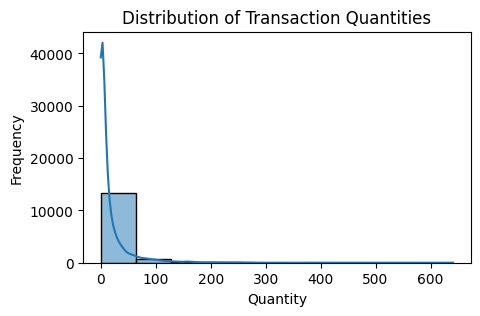

In [11]:
# Visualize distribution of transaction quantities
plt.figure(figsize=(5, 3))
sns.histplot(df['QTY'], bins=10, kde=True)
plt.title('Distribution of Transaction Quantities')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

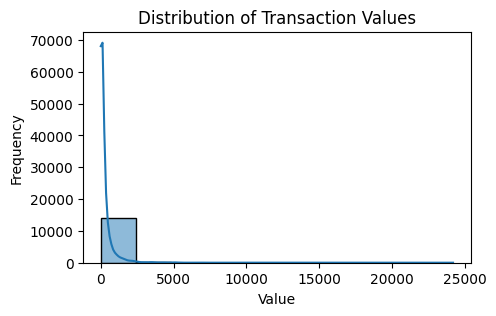

In [12]:
# Visualize distribution of transaction values
plt.figure(figsize=(5, 3))
sns.histplot(df['VALUE'], bins=10, kde=True)
plt.title('Distribution of Transaction Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

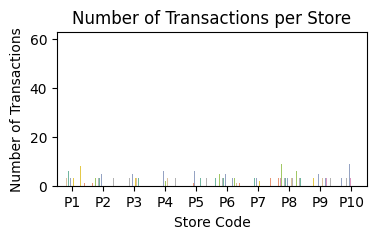

In [30]:
# Visualize the count of transactions by store code
plt.figure(figsize=(4,2))
sns.countplot(x='STORECODE', data=df,hue='BRD', palette='Set2', legend=False)
plt.title('Number of Transactions per Store')
plt.xlabel('Store Code')
plt.ylabel('Number of Transactions')
plt.show()

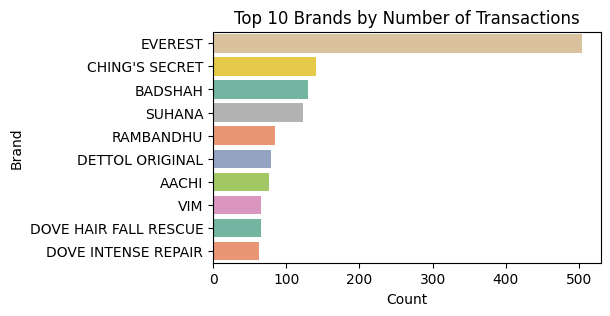

In [27]:
# Set the number of top brands to display
top_n = 10

# Get the top N brands with the highest transaction counts
top_brands = df['BRD'].value_counts().nlargest(top_n).index

# Filter the DataFrame to include only the top brands
df_top = df[df['BRD'].isin(top_brands)]

plt.figure(figsize=(5, 3))
sns.countplot(y='BRD', data=df_top, order=top_brands, hue='BRD', palette='Set2', legend=False)
plt.title('Top {} Brands by Number of Transactions'.format(top_n))
plt.xlabel('Count')
plt.ylabel('Brand')
plt.show()

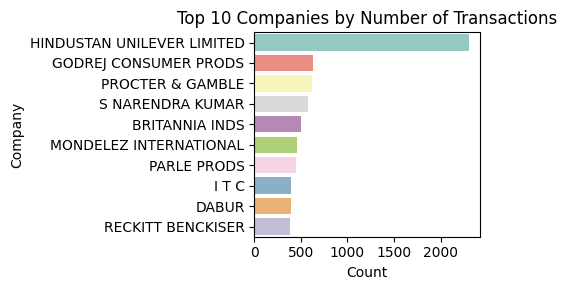

In [35]:
# Set the number of top companies to display
top_n = 10

# Get the top N companies with the highest transaction counts
top_companies = df['CMP'].value_counts().nlargest(top_n).index

# Filter the DataFrame to include only the top companies
df_top = df[df['CMP'].isin(top_companies)]

# Visualize the count of transactions by company
plt.figure(figsize=(5, 3))
sns.countplot(y='CMP', data=df_top,order=top_companies, hue='CMP', palette='Set3', legend=False)
plt.title('Top {} Companies by Number of Transactions'.format(top_n))
plt.xlabel('Count')
plt.ylabel('Company')
plt.tight_layout()
plt.show()

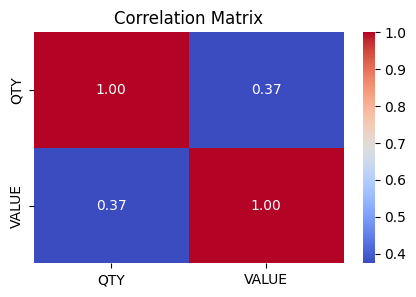

In [36]:
# Exclude non-numeric columns from correlation calculation
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Visualize correlation matrix
plt.figure(figsize=(5,3))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()